In [22]:
import pandas as pd

In [23]:
from google.colab import files

uploaded = files.upload()

Saving part-m-00000.csv to part-m-00000.csv


In [25]:
df = pd.read_csv('part-m-00000.csv', header=None)

df.columns = [
        'InvoiceID', 'Branch', 'City', 'CustomerType', 'Gender', 'ProductLine',
        'UnitPrice', 'Quantity', 'Tax', 'Total', 'Date', 'Time',
        'Payment', 'COGS', 'GrossMarginPercentage', 'GrossIncome', 'Rating'
    ]

print(df.head())

     InvoiceID Branch       City CustomerType  Gender             ProductLine  \
0  750-67-8428      A     Yangon       Member  Female       Health and beauty   
1  226-31-3081      C  Naypyitaw       Normal  Female  Electronic accessories   
2  631-41-3108      A     Yangon       Normal    Male      Home and lifestyle   
3  123-19-1176      A     Yangon       Member    Male       Health and beauty   
4  373-73-7910      A     Yangon       Normal    Male       Sports and travel   

   UnitPrice  Quantity      Tax     Total        Date   Time      Payment  \
0      74.69         7  26.1415  548.9715  05-01-2019  13:08      Ewallet   
1      15.28         5   3.8200   80.2200  08-03-2019  10:29         Cash   
2      46.33         7  16.2155  340.5255  03-03-2019  13:23  Credit card   
3      58.22         8  23.2880  489.0480  27-01-2019  20:33      Ewallet   
4      86.31         7  30.2085  634.3785  08-02-2019  10:37      Ewallet   

     COGS  GrossMarginPercentage  GrossIncome  Rat

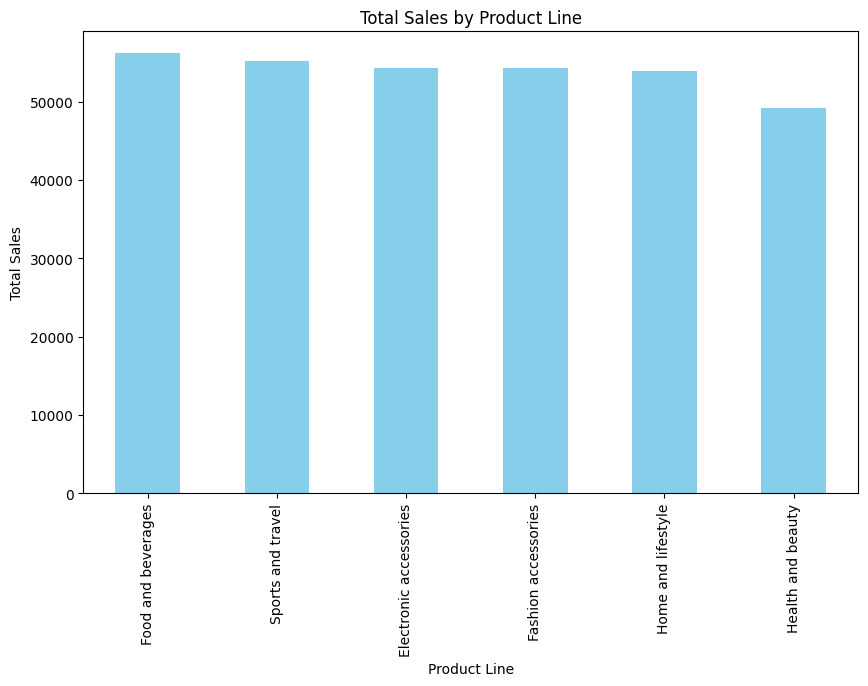

In [26]:
import matplotlib.pyplot as plt

# Group by ProductLine and sum the Total sales
product_sales = df.groupby('ProductLine')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

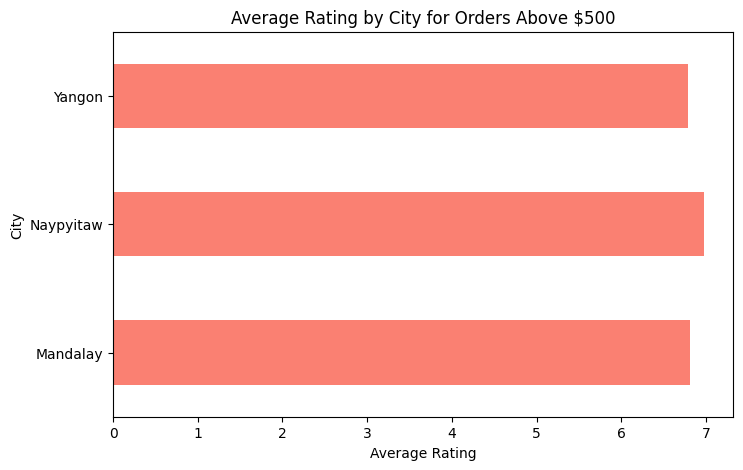

In [27]:
# Filter for high-value orders and calculate average rating by city
high_value_orders = df[df['Total'] > 500]
city_ratings = high_value_orders.groupby('City')['Rating'].mean()

# Plot
plt.figure(figsize=(8, 5))
city_ratings.plot(kind='barh', color='salmon')
plt.title('Average Rating by City for Orders Above $500')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

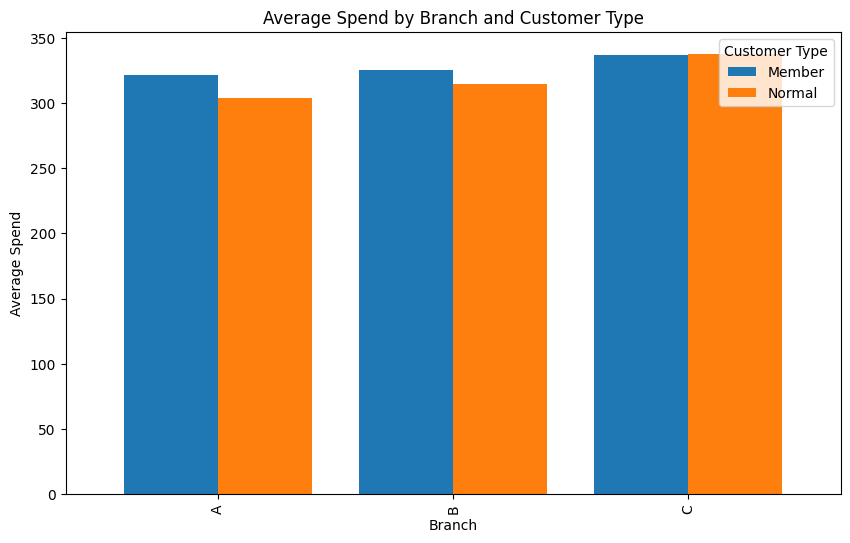

In [29]:
# Group by Branch and CustomerType, calculate the average and max Total
branch_customer = df.groupby(['Branch', 'CustomerType'])['Total'].agg(['mean', 'max']).unstack()

# Plot
branch_customer['mean'].plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Average Spend by Branch and Customer Type')
plt.xlabel('Branch')
plt.ylabel('Average Spend')
plt.legend(title='Customer Type')
plt.show()

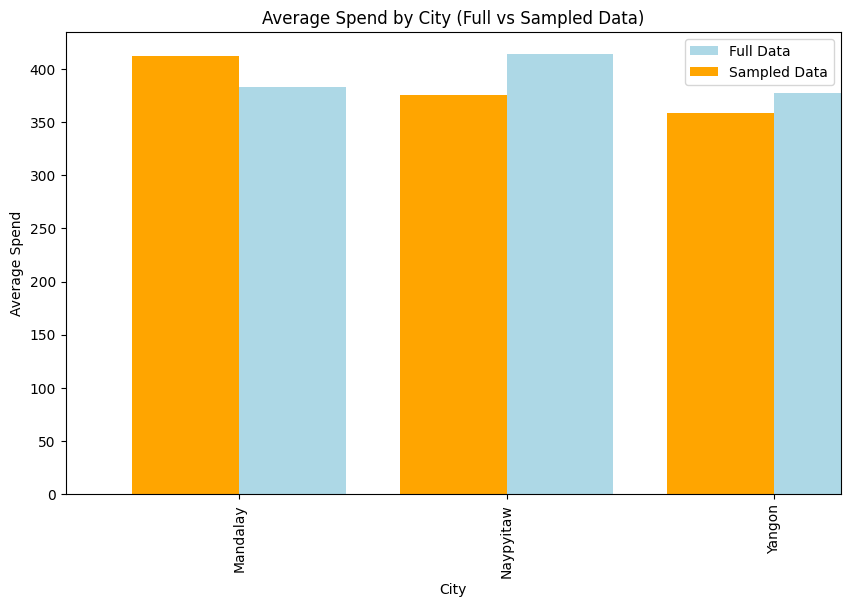

In [30]:
# Sample 20% of data
sampled_df = df.sample(frac=0.2)

# Calculate average spend per city for both sampled and full data
city_avg_total = df[df['Total'] > 100].groupby('City')['Total'].mean()
city_avg_total_sampled = sampled_df[sampled_df['Total'] > 100].groupby('City')['Total'].mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
city_avg_total.plot(kind='bar', position=0, width=0.4, ax=ax, label='Full Data', color='lightblue')
city_avg_total_sampled.plot(kind='bar', position=1, width=0.4, ax=ax, label='Sampled Data', color='orange')
plt.title('Average Spend by City (Full vs Sampled Data)')
plt.xlabel('City')
plt.ylabel('Average Spend')
plt.legend()
plt.show()

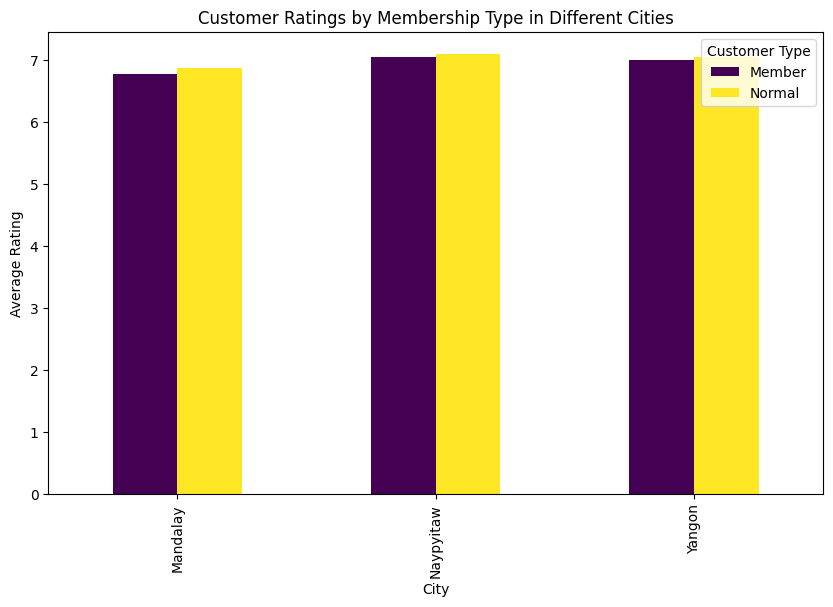

In [32]:
# Group by City and CustomerType and calculate average Rating
ratings_by_city_type = df.groupby(['City', 'CustomerType'])['Rating'].mean().unstack()

# Plot
ratings_by_city_type.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Customer Ratings by Membership Type in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.legend(title='Customer Type')
plt.show()

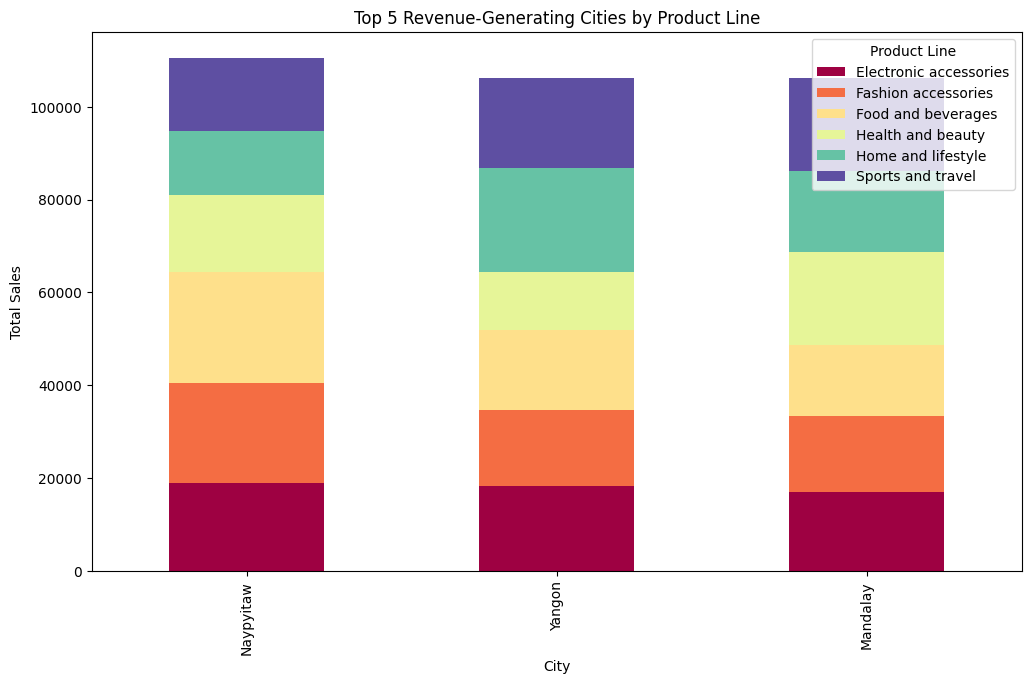

In [33]:
# Group by City and ProductLine, and sum Total
city_product_sales = df.groupby(['City', 'ProductLine'])['Total'].sum().unstack().fillna(0)

# Get top 5 cities by total revenue
top_cities = city_product_sales.sum(axis=1).nlargest(5).index
top_city_sales = city_product_sales.loc[top_cities]

# Plot
top_city_sales.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Spectral')
plt.title('Top 5 Revenue-Generating Cities by Product Line')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.show()

<Figure size 1000x600 with 0 Axes>

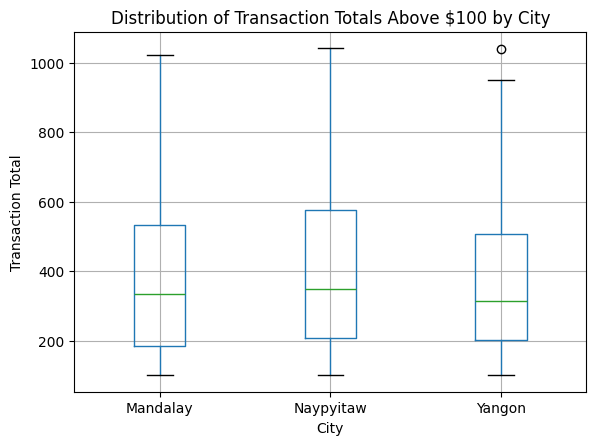

In [34]:
# Filter transactions above $100
high_transactions = df[df['Total'] > 100]

# Plot boxplot for each city
plt.figure(figsize=(10, 6))
high_transactions.boxplot(column='Total', by='City')
plt.title('Distribution of Transaction Totals Above $100 by City')
plt.xlabel('City')
plt.ylabel('Transaction Total')
plt.suptitle('')
plt.show()

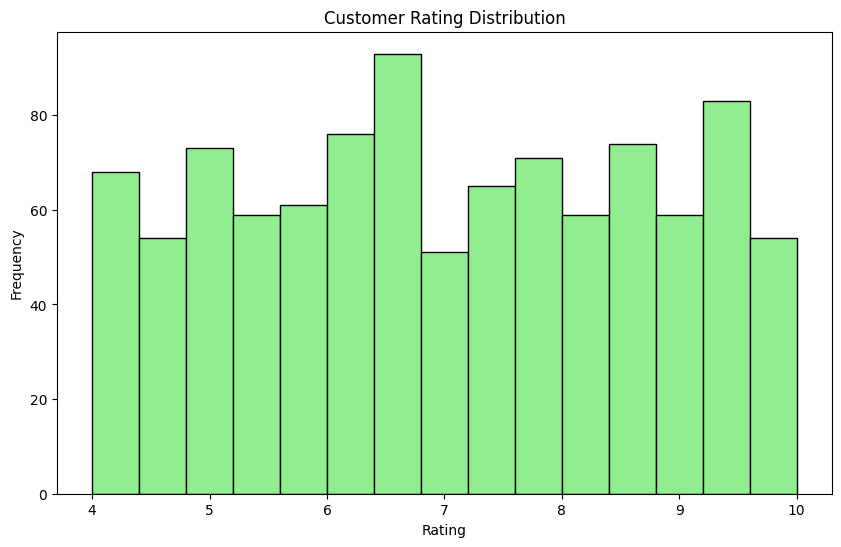

In [35]:
# Plot histogram of Ratings
plt.figure(figsize=(10, 6))
df['Rating'].plot(kind='hist', bins=15, color='lightgreen', edgecolor='black')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()